In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset

In [24]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Check out some basic information about the dataset

In [25]:
# Number of instances
print('Number of instances in training set:\t {}'.format(train.shape[0]))
print('Number of instances in test set:\t {}'.format(test.shape[0]))

Number of instances in training set:	 10886
Number of instances in test set:	 6493


In [26]:
# Attributes
print('train.dtypes: \n{}'.format(train.dtypes))
print('\n')
print('test.dtypes: \n{}'.format(test.dtypes))

train.dtypes: 
datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


test.dtypes: 
datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object


Attributes "casual" and "registered" are not presented in the test set, so they will be droped.

The original attributes for prediction are: datetime, season, holiday, workingday, weather, temp, atemp, humidity, and windspeed.

### Check out missing datas

In [27]:
print('Number of missing data in training set:\t{}'.format(train.isnull().sum().sum()))
print('Number of missing data in test set:\t{}'.format(test.isnull().sum().sum()))

Number of missing data in training set:	0
Number of missing data in test set:	0


### The distribution of the target "count"

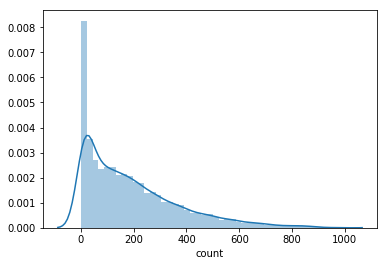

In [28]:
sns.distplot(train['count'])

This competition is rated on the root mean squared logarithmic error, so we do a log transformation on the target

In [29]:
train['count'] = np.log1p(train['count'])

### The distribution of the log transformed target

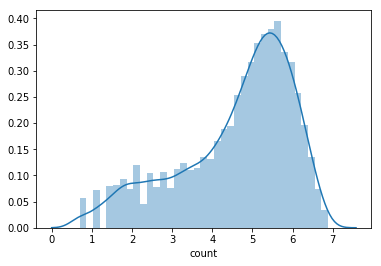

In [30]:
sns.distplot(train['count'])

Most of the target fall into 4 ~ 6

### Check out the attributes individually

In [31]:
# Drop the useless attributes

train = train.drop(['casual', 'registered'], axis=1)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,2.833213
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,3.713572
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,3.496508
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,2.639057
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.693147


In [32]:
# turn the "datetime" attribute to pandas datetime type

train['datetime'] = pd.to_datetime(train['datetime'])

In [33]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                float64
dtype: object

In [34]:
# create attributes for year, month, day... and drop the original datetime attribute

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

train = train.drop('datetime', axis=1)

train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,2.833213,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,3.713572,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,3.496508,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,2.639057,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0.693147,2011,1,1,4


In [35]:
def plot_category(feat, scale='area', hue=None):
    plt.figure(figsize=(24, 6))
    plt.subplot(1, 3, 1)
    sns.countplot(data=train, x=feat, hue=hue)
    plt.subplot(1, 3, 2)
    sns.boxplot(data=train, x=feat, y='count', hue=hue)
    plt.subplot(1, 3, 3)
    sns.violinplot(data=train, x=feat, y='count', scale=scale, hue=hue)
    plt.show()

#### season

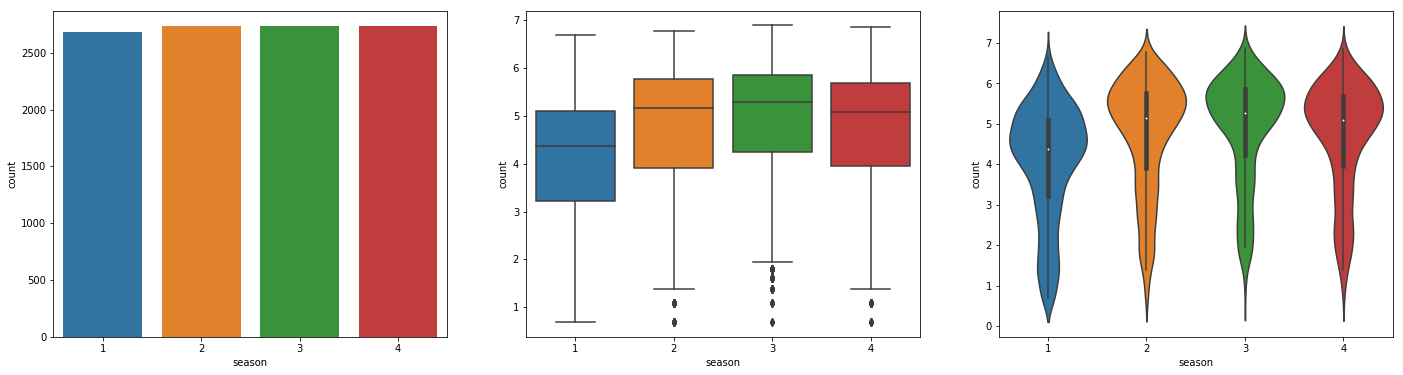

In [36]:
plot_category('season', scale='count')

The target distributed similarly across four seasons, but season 1 and 4 got lower mean and median value.

#### holiday

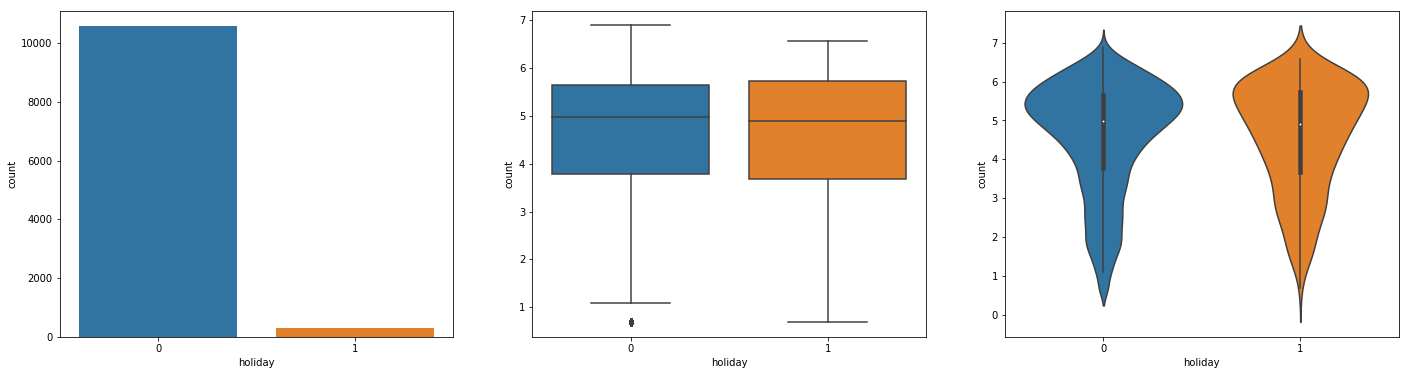

In [37]:
plot_category('holiday')

Number of holidays are significantly higher than non-holidays, target tend to be higher in non-holidays.

#### working_day

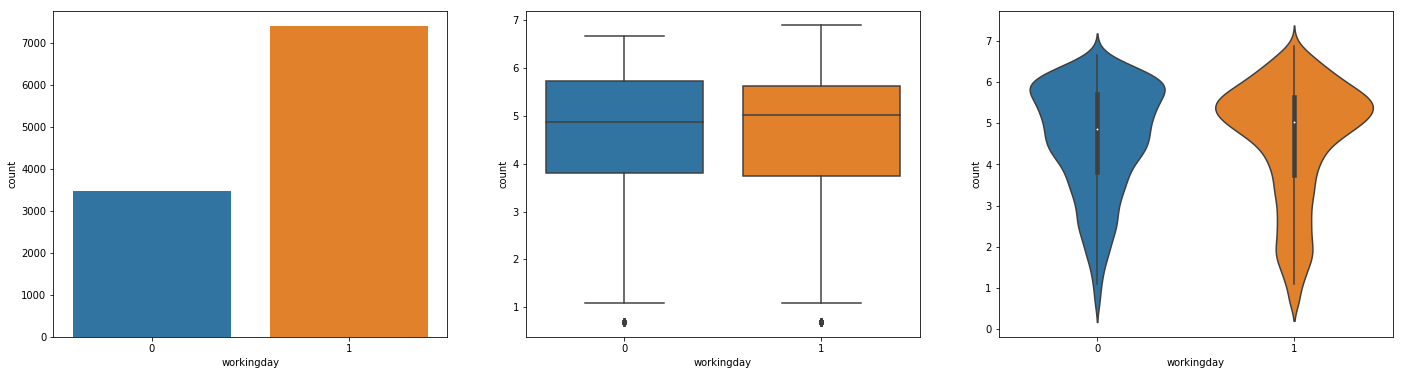

In [38]:
plot_category('workingday')

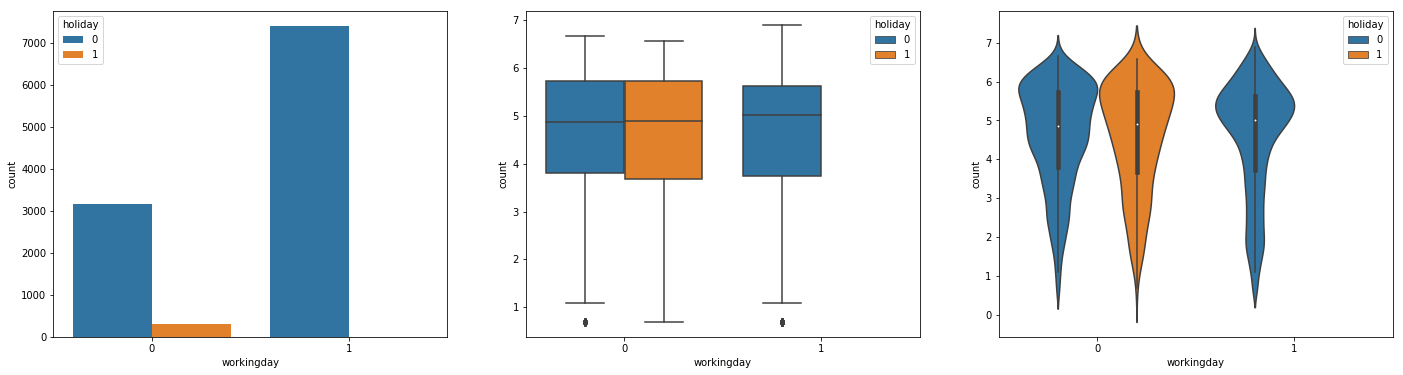

In [39]:
plot_category('workingday', hue='holiday')

Number of workingdays are significantly higher than non-workingdays, target tend to be higher in workingday.

There are some holidays in non-workingdays, but there are no holidays in workingdays, which may be the reason why non-workingdays got lower target values.

To sum up, people may use the bike to go to work, so when they need to work, the target gets higher.

### weather

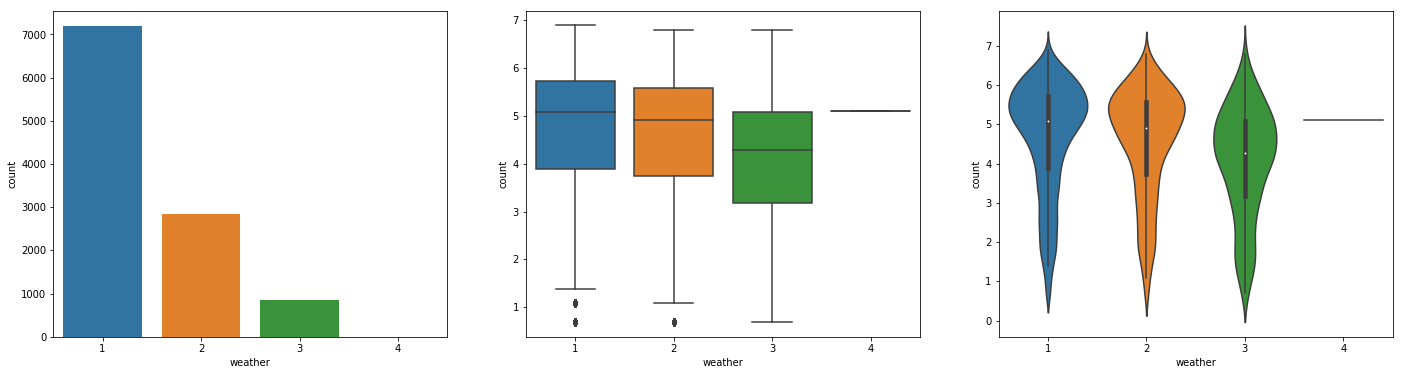

In [41]:
plot_category('weather')

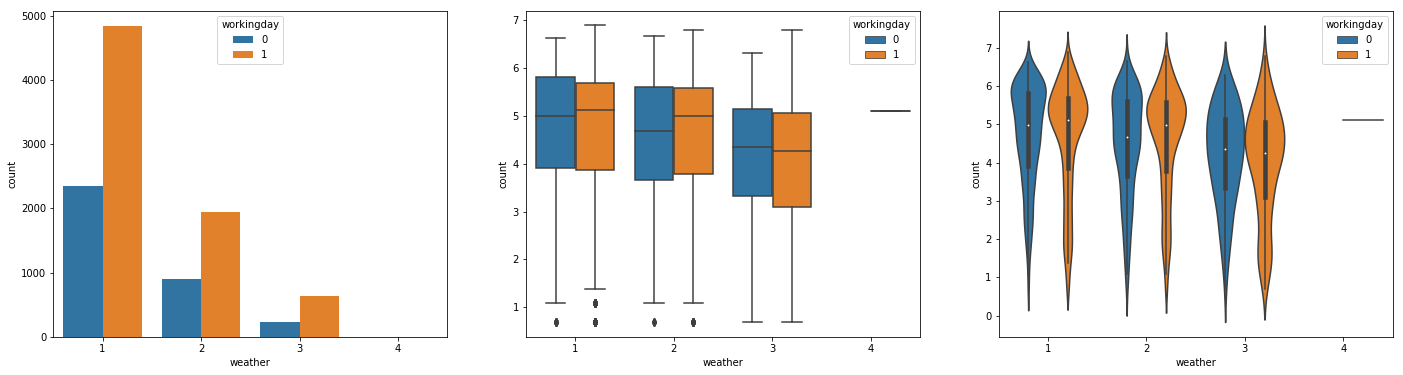

In [43]:
plot_category('weather', hue='workingday')